## WNTR test installation
## Imports

In [1]:
import wntr

## Units
WNTR uses SI (International System) units (length in meters, time in seconds, mass in kilograms).  See https://usepa.github.io/WNTR/units.html for more details.

# Water Network Model

The `WaterNetworkModel` object defines the water distribution system and simulation options. The object can be created from an EPANET INP file.

In [2]:
# Create a WaterNetworkModel from an EPANET INP file
wn = wntr.network.WaterNetworkModel('networks/Net3.inp')

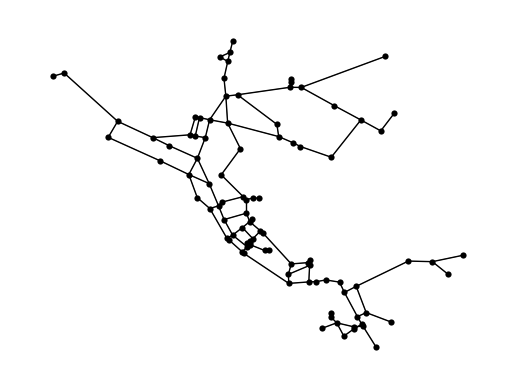

In [3]:
# Plot a basic network graphic
ax = wntr.graphics.plot_network(wn)

## Run hydraulic simulation and get results

In [4]:
# Simulate hydraulics using EPANET
sim = wntr.sim.EpanetSimulator(wn)
results_EPANET = sim.run_sim()

In [5]:
# View EpanetSimulator pressure results
results_EPANET.node['pressure'].head()

name,10,15,20,35,40,50,60,601,61,101,...,267,269,271,273,275,River,Lake,1,2,3
0,-0.450070,28.593657,8.839204,40.612469,3.992880,7.162800,63.706444,92.187874,92.187874,31.553928,...,38.151543,44.650841,42.623016,40.477558,39.655293,0.0,0.0,3.992880,7.162800,8.839199
3600,28.253721,28.887156,9.099179,41.513771,4.191203,6.752899,63.751488,92.490318,92.490318,39.867870,...,39.722370,45.767307,43.530823,41.041176,40.189754,0.0,0.0,4.191203,6.752899,9.099170
7200,28.764309,30.003231,9.450786,42.429108,4.620553,6.369764,63.793495,92.773643,92.773643,41.517067,...,40.730850,46.730705,44.450729,41.956635,41.098701,0.0,0.0,4.620553,6.369764,9.450771
10800,28.871420,30.415579,9.869709,42.817181,5.158957,6.534997,63.813141,92.906601,92.906601,41.862659,...,41.116528,47.115646,44.837078,42.284969,41.419266,0.0,0.0,5.158957,6.534997,9.869695
14400,29.659281,31.970745,10.284730,44.297886,5.665973,6.740044,63.877914,93.346977,93.346977,44.400757,...,42.755901,48.670105,46.327477,43.938866,43.075676,0.0,0.0,5.665973,6.740044,10.284711


Text(0, 0.5, 'Pressure (m)')

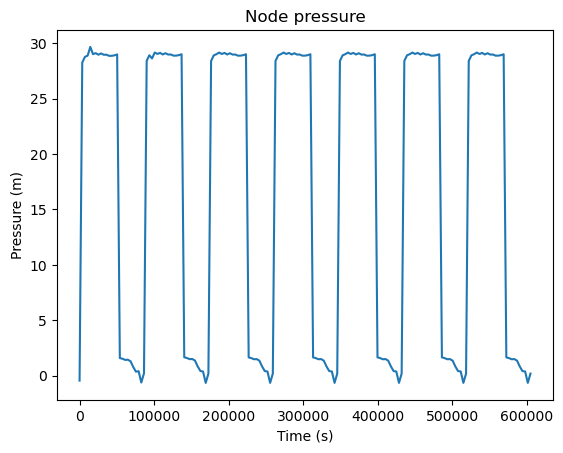

In [9]:
# Plot timeseries of a given node
node_pressure = results_EPANET.node['pressure'].loc[:,'10']
ax = node_pressure.plot(title='Node pressure')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Pressure (m)')

Text(0, 0.5, 'Tank Level (m)')

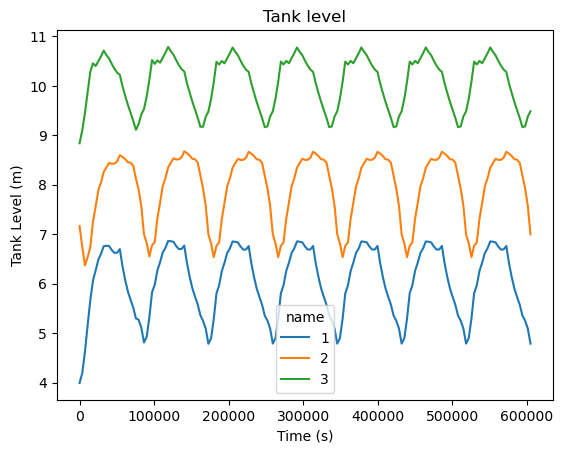

In [6]:
# Plot timeseries of tank levels
tank_levels = results_EPANET.node['pressure'].loc[:,wn.tank_name_list]
ax = tank_levels.plot(title='Tank level')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Tank Level (m)')

Text(0, 0.5, 'Pump flowrate (m$^3$/s)')

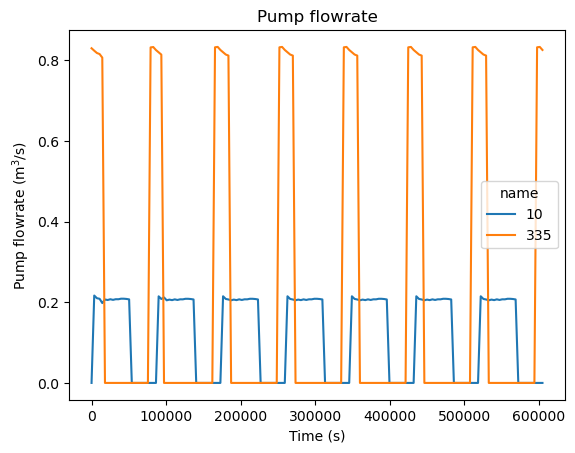

In [7]:
# Plot timeseries of pump flowrates
pump_flowrates = results_EPANET.link['flowrate'].loc[:,wn.pump_name_list]
ax = pump_flowrates.plot(title='Pump flowrate')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Pump flowrate (m$^3$/s)')

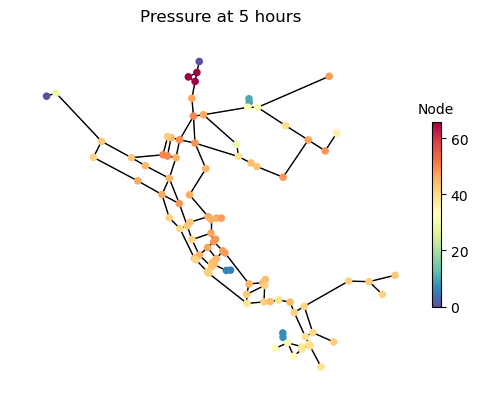

In [8]:
# Plot pressure at hour 5 on the network
pressure_at_5hr = results_EPANET.node['pressure'].loc[5*3600, :]
ax = wntr.graphics.plot_network(wn, node_attribute=pressure_at_5hr, node_size=30, title='Pressure at 5 hours')